In [1]:
import pandas as pd
import numpy as np 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/anubhav08/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('Text Reviews.csv')
df.dtypes

title    object
dtype: object

In [3]:
df.head(20)

,title
0,It's very very beautiful. I loved all the desi...
1,Poor quality. One time used products
2,"Poor quality product, seems fake, colour faded..."
3,The studs look good and pretty classy
4,"Poor quality product, seems fake, colour faded..."
5,Not bad
6,"Poor quality product, seems fake, colour faded..."
7,Damaged product received. Looks beautiful on t...
8,"Poor quality product, seems fake, colour faded..."
9,It is all plastic and break easily even the ho...


In [4]:
print(df.shape)

(35, 1)


In [5]:
messages = " ".join([str(i) for i in df['title']])
words = word_tokenize(messages)

In [6]:
messages

"It's very very beautiful. I loved all the designs. Thank you so much Shining Diva Poor quality. One time used products Poor quality product, seems fake, colour faded away The studs look good and pretty classy Poor quality product, seems fake, colour faded away Not bad Poor quality product, seems fake, colour faded away Damaged product received. Looks beautiful on the picture but in reality it’s looks old and damaged and there’s no good polish over the product . Golden hoops are almost rusty which looks very poor. Packaging was okay but as soon as I opened the pack the damaged hoop pop out . Quality is zero. Advised to not purchase Poor quality product, seems fake, colour faded away It is all plastic and break easily even the hooka are of plastic not value of money from my perspective Poor quality product, seems fake, colour faded away Nice studs Poor quality product, seems fake, colour faded away Not as I expected. All the studs are tiny and quick to loose color with one wear. Poor qu

In [7]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [8]:
lowered = clean_words(words)

In [9]:
bow = Counter(lowered)
bow

Counter({'beautiful': 2,
         'loved': 2,
         'design': 3,
         'thank': 1,
         'much': 2,
         'shining': 1,
         'diva': 1,
         'poor': 10,
         'quality': 14,
         'one': 4,
         'time': 2,
         'used': 1,
         'product': 17,
         'seems': 8,
         'fake': 8,
         'colour': 11,
         'faded': 8,
         'away': 8,
         'stud': 4,
         'look': 7,
         'good': 8,
         'pretty': 2,
         'classy': 1,
         'bad': 1,
         'damaged': 3,
         'received': 1,
         'picture': 1,
         'reality': 1,
         'old': 1,
         'polish': 1,
         'golden': 3,
         'hoop': 2,
         'almost': 1,
         'rusty': 1,
         'packaging': 2,
         'okay': 1,
         'soon': 1,
         'opened': 1,
         'pack': 1,
         'pop': 1,
         'zero': 1,
         'advised': 1,
         'purchase': 1,
         'plastic': 3,
         'break': 1,
         'easily': 2,
         'even

In [10]:
data = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [11]:
data = data.head(10)

<AxesSubplot:xlabel='frequency', ylabel='word'>

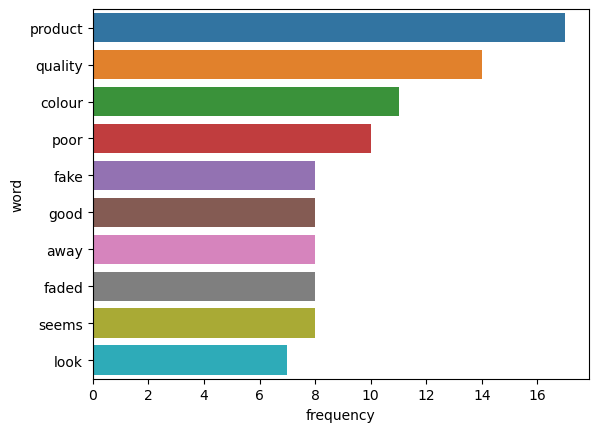

In [12]:
sns.barplot(x='frequency',y='word',data=data)